In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [2]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (303 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [3]:
pip install pdf2image

In [4]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Currency Classification Using Deep Learning

Imagine walking into a store with a handful of cash, ready to make a purchase. The cashier quickly identifies each bill and calculates the total amount. But what if this process could be automated using a camera? What if a machine could instantly identify and classify different currency bills? This project explores exactly that—building a deep learning model to classify images of U.S. currency.

# 1. Introduction
Currency classification is a critical task in many areas, including retail, banking, and vending machines. For example, an automated teller machine (ATM) needs to distinguish between different denominations to dispense the correct amount of cash. In this project, we developed a model that can classify U.S. currency into categories like "One Dollar," "Five Dollars," "Ten Dollars," etc., using deep learning techniques.


### Step 1: Importing Necessary Libraries

The first step in any machine learning project is to import the necessary libraries. These libraries provide the tools to handle data, build models, and evaluate their performance.


In [5]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import imghdr
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

#### What's Going On?

1. **Basic Python Libraries:**
   - **os:** Helps in interacting with the operating system to manage files and directories.
   - **numpy:** Fundamental package for numerical computation, particularly working with arrays.
   - **pandas:** Useful for data manipulation and analysis, especially for handling tabular data.

2. **Progress Tracking:**
   - **tqdm:** Adds progress bars to loops, making it easier to track long-running processes.

3. **Computer Vision:**
   - **cv2:** An open-source computer vision library (OpenCV) used here for image processing tasks.

4. **Data Preprocessing:**
   - **LabelEncoder:** Encodes categorical labels into integers.
   - **to_categorical:** Converts class vectors to binary class matrices.

5. **Machine Learning and Deep Learning:**
   - **scikit-learn:** Used for data splitting, preprocessing, and evaluation metrics.
   - **Keras & TensorFlow:** Popular deep learning frameworks, primarily used here for building and training the neural networks.

6. **Visualization:**
   - **Matplotlib & Seaborn:** These libraries are essential for creating visual representations of the data and model performance, helping to understand trends and patterns.

7. **Model Optimization:**
   - **ReduceLROnPlateau:** A Keras callback that reduces the learning rate when a metric has stopped improving, helping to fine-tune the training process.

# 1. Removing correpted Images

In [ ]:
data_dir = '/content/drive/MyDrive/personal_project/USA Currency'
image_exts = ['jpeg','jpg', 'png']
for image_class in os.listdir(data_dir):
    print(image_class)

1 Dollar
2 Dollar
5 Dollar
10 Dollar
50 Dollar
100 Dollar


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
            else:
                with Image.open(image_path) as im:
                    # Remove ICC profile
                    im.info.pop('icc_profile', None)
                    im.save(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}: {e}')
            os.remove(image_path)



#### What's Happening?

1. **Directory and Extension Setup:**
   - **data_dir:** Specifies the directory where the image data is stored.
   - **image_exts:** List of valid image file extensions (JPEG, JPG, PNG) that are allowed in the dataset.

2. **Iterate Through Directories and Files:**
   - **os.listdir(data_dir):** Lists all the directories (which represent different classes of images) in the dataset directory.
   - For each class, the code iterates through all images to check their validity.

3. **Image Validation:**
   - **cv2.imread(image_path):** Attempts to read the image. If the image is corrupted, this function may fail.
   - **imghdr.what(image_path):** Checks the image extension to ensure it matches the allowed types.
   - **Image.open(image_path) with PIL:** Opens the image and removes any unnecessary metadata (e.g., ICC profile) to ensure consistency.

4. **Handling Errors:**
   - If an image is corrupted, has an invalid extension, or if there's any issue while processing it, the code prints an error message and removes the problematic image from the dataset.

This step is essential for maintaining a clean and reliable dataset, similar to ensuring that only quality photos are included in your album. By removing corrupted or improperly formatted images, you prevent potential issues during model training and improve the overall quality of your data.

# 2. Load Image Dataset

In [ ]:
X = []
Z = []
img_size = 224
One_Dollar_dir='/content/drive/MyDrive/personal_project/USA Currency/1 Dollar'
Ten_Dollar_dir = '/content/drive/MyDrive/personal_project/USA Currency/10 Dollar'
Hundred_Dollar_dir = '/content/drive/MyDrive/personal_project/USA Currency/100 Dollar'
Two_Dollar_dir = '/content/drive/MyDrive/personal_project/USA Currency/2 Dollar'
Five_Dollar_dir = '/content/drive/MyDrive/personal_project/USA Currency/5 Dollar'
Fifty_dollar_dir = '/content/drive/MyDrive/personal_project/USA Currency/50 Dollar'

In [ ]:
def assign_label(img, currency_type):
  return currency_type

In [ ]:
def make_train_data(currency_type, dir):
  for img in tqdm(os.listdir(dir)):
    label = assign_label(img, currency_type)
    path = os.path.join(dir, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (img_size, img_size))

    X.append(np.array(img))
    Z.append(str(label))

In [ ]:
make_train_data('One', One_Dollar_dir )
make_train_data('Ten', Ten_Dollar_dir )
make_train_data('hundred', Hundred_Dollar_dir )
make_train_data('Two', Two_Dollar_dir )
make_train_data('Five', Five_Dollar_dir )
make_train_data('Fifty', Fifty_dollar_dir )
print()
print(len(X))

100%|██████████| 685/685 [00:13<00:00, 52.10it/s] 


3906



#### What's Happening?

1. **Setup Variables:**
   - **X:** List to store image data.
   - **Z:** List to store labels corresponding to each image.
   - **img_size:** The target size (224x224 pixels) to which all images will be resized.

2. **Directory Paths:**
   - **One_Dollar_dir, Ten_Dollar_dir, etc.:** Paths to directories where images of different currency denominations are stored.

3. **Label Assignment:**
   - **assign_label(img, currency_type):** Function that assigns a label to an image based on its currency type. Here, the label is just the currency type, which helps in categorizing the images.

4. **Loading and Processing Images:**
   - **make_train_data(currency_type, dir):** Function that processes images from a given directory.
     - **os.listdir(dir):** Lists all image filenames in the directory.
     - **cv2.imread(path, cv2.IMREAD_COLOR):** Reads the image from the path.
     - **cv2.resize(img, (img_size, img_size)):** Resizes the image to the target size.
     - **X.append(np.array(img)):** Adds the processed image to the list of images.
     - **Z.append(str(label)):** Adds the label to the list of labels.

5. **Processing Images from Each Directory:**
   - The `make_train_data` function is called for each directory to process and label images of different currency denominations.

6. **Print Statement:**
   - **print(len(X)):** Prints the total number of images loaded and processed.



# 4. Shuffle Images

In [ ]:
# Shuffle the combined data
X, Z = shuffle(X, Z, random_state=42)


#### What's Happening?

1. **Shuffling the Data:**
   - **shuffle(X, Z, random_state=42):** The `shuffle` function from `sklearn.utils` randomly reorders the images (X) and their corresponding labels (Z) while keeping them aligned.
   - **random_state=42:** This parameter sets the seed for the random number generator, ensuring that the shuffle operation is reproducible. Using the same seed will give the same shuffled order each time you run the code, which is useful for consistent experiments.

2. **Purpose of Shuffling:**
   - **Prevents Bias:** Randomizing the order of the images helps to ensure that the model does not learn any sequence-specific patterns or biases from the training data.
   - **Improves Generalization:** Shuffling ensures that the model trains on a varied and representative sample of data, which can improve its ability to generalize to new, unseen images.


Visualizing a few samples from the dataset allows us to verify that the images and their labels are correctly aligned and that the data looks as expected. This step is crucial for catching any potential issues before training the model.

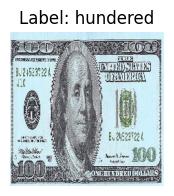

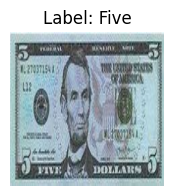

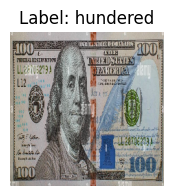

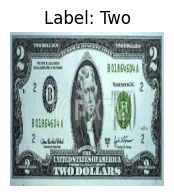

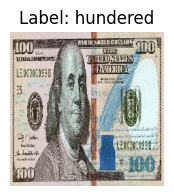

In [ ]:
# Display a few images with their labels
for i in range(5):  # Show 5 examples
    plt.figure(figsize=(2, 2))
    plt.imshow(X[i])
    plt.title(f"Label: {Z[i]}")
    plt.axis('off')
    plt.show()

#### What's Happening?

1. **Setting Up Visualization:**
   - **plt.figure(figsize=(2, 2)):** Creates a new figure for each image with a specified size (2x2 inches). This ensures that each image is displayed clearly and is not too large.

2. **Displaying Images:**
   - **plt.imshow(X[i]):** Displays the image at index `i` from the list of images `X`.
   - **plt.title(f"Label: {Z[i]}"):** Sets the title of the plot to the label of the image, allowing you to see which label corresponds to the displayed image.
   - **plt.axis('off'):** Hides the axis lines and labels for a cleaner view of the image.

3. **Showing the Image:**
   - **plt.show():** Renders the image and its label on the screen.


# 5. Normalize the images

In [ ]:
# Function to normalize the images
def normalize_images(X):
    return np.array(X) / 255.0

# Normalize the image data
X = normalize_images(X)

# Convert categorical labels to numeric values
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,6)

print(f"Total number of images: {len(X)}")

Total number of images: 3906



#### What's Happening?

1. **Normalizing Images:**
   - **normalize_images(X):** A function that normalizes image pixel values to a range of [0, 1]. This is done by dividing each pixel value by 255 (the maximum pixel value for an 8-bit image).
   - **X = normalize_images(X):** Applies normalization to the entire dataset. Normalization helps in speeding up the training process and improving model performance by ensuring that all input features have the same scale.

2. **Encoding Labels:**
   - **LabelEncoder:** Converts categorical labels (like 'One', 'Ten', etc.) into numeric values. This is necessary because machine learning models work with numeric data.
   - **le.fit_transform(Z):** Transforms the categorical labels in `Z` into numeric values.
   - **to_categorical(Y, 6):** Converts the numeric labels into one-hot encoded vectors, where each class is represented by a binary vector. The number `6` indicates that there are 6 different classes in the dataset.

3. **Output:**
   - **print(f"Total number of images: {len(X)}"):** Prints the total number of images in the dataset, confirming the size of the dataset after normalization and label encoding.



Now, lets's randomly display a few images from the dataset which helps us visually inspect the diversity and labeling of the data. This step allows us to ensure that the dataset is well-represented and that the labels are correctly assigned before training the model.



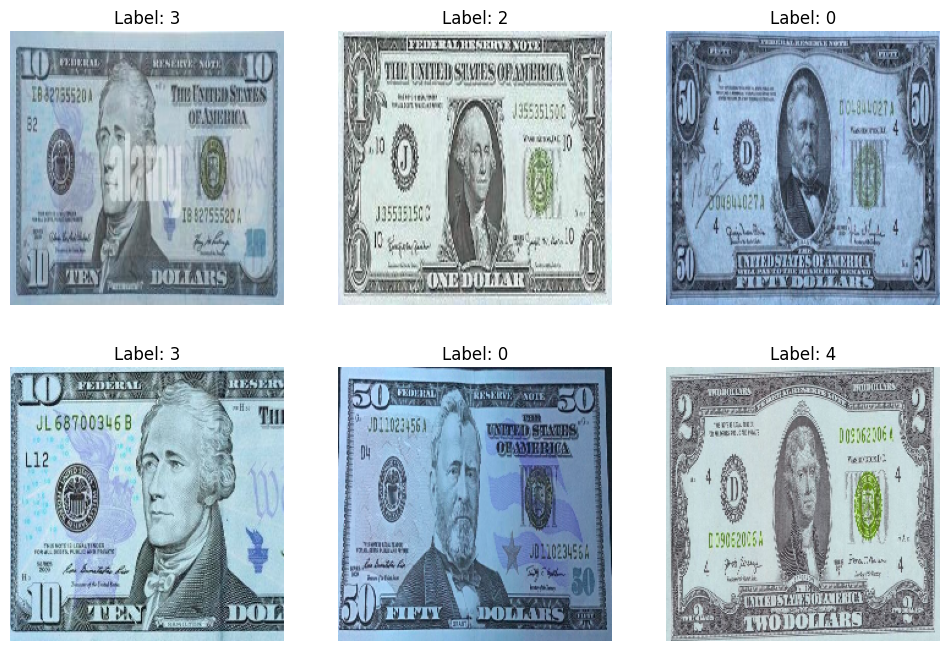

In [ ]:
import matplotlib.pyplot as plt
import random

# Function to display random images with their labels
def display_random_images(X, Y, num_images=6):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        index = random.randint(0, len(X) - 1)
        plt.subplot(2, 3, i + 1)
        plt.imshow(X[index])
        plt.title(f"Label: {np.argmax(Y[index])}")
        plt.axis('off')
    plt.show()

# Display 6 random images with their labels
display_random_images(X, Y, num_images=6)



#### What's Happening?

1. **Function Definition:**
   - **display_random_images(X, Y, num_images=6):** A function that randomly selects and displays a specified number of images from the dataset, along with their labels.

2. **Random Image Selection:**
   - **index = random.randint(0, len(X) - 1):** Randomly selects an index from the dataset. This index is used to choose which image and label to display.

3. **Plotting Images:**
   - **plt.subplot(2, 3, i + 1):** Creates a subplot for each image. The arguments `(2, 3, i + 1)` specify a grid of 2 rows and 3 columns for displaying the images.
   - **plt.imshow(X[index]):** Displays the image at the selected index.
   - **plt.title(f"Label: {np.argmax(Y[index])}"):** Sets the title of the plot to the label of the image. `np.argmax(Y[index])` is used to convert the one-hot encoded label back to its original categorical form.
   - **plt.axis('off'):** Hides the axis lines and labels to focus on the images themselves.

4. **Displaying the Images:**
   - **plt.show():** Renders and displays the images with their labels.



# 6. Split the data into Train, Validation and Test set

In [ ]:
# Split the data
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=1/3, random_state=42 )  # 20% val, 10% test

print(f"Number of training images: {len(X_train)}")
print(f"Number of validation images: {len(X_val)}")
print(f"Number of test images: {len(X_test)}")

Number of training images: 2734
Number of validation images: 781
Number of test images: 391



#### What's Happening?

1. **First Split:**
   -  Splits the dataset into training and a temporary set. 70% of the data is used for training (`X_train`, `Y_train`), and 30% is reserved for further splitting (`X_temp`, `Y_temp`).

2. **Second Split:**
   - Further splits the temporary set into validation and test sets. 1/3 of the temporary set is used for validation (`X_val`, `Y_val`), and the remaining 2/3 becomes the test set (`X_test`, `Y_test`).

3. **Output:**
   -  Prints the number of images in the training set.
   -  Prints the number of images in the validation set.
   -  Prints the number of images in the test set.



# 7. Fine-tuning a Pre-trained Image Classifier for Currency Classification

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers so they are not trainable
for layer in base_model.layers:
  layer.trainable = False

num_classes = 6


#### What's Happening?

1. **Loading the Pre-Trained Model:**
   - **ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)):**
     - **`weights='imagenet'`:** Loads the model with weights pre-trained on the ImageNet dataset. This allows the model to use features learned from a large and diverse dataset.
     - **`include_top=False`:** Excludes the final classification layers of the model. This is useful when you want to add your own classification layers on top of the pre-trained base.
     - **`input_shape=(224, 224, 3)`:** Specifies the input shape of the images (224x224 pixels with 3 color channels).

2. **Freezing Layers:**
   - **`for layer in base_model.layers: layer.trainable = False`:** Sets all layers of the base model to be non-trainable. This means that during training, the weights of these layers will not be updated. By freezing the pre-trained layers, you ensure that the model retains the knowledge it has learned from ImageNet, while you focus on training the new layers you add.

3. **Defining Number of Classes:**
   - **`num_classes = 6`:** Specifies the number of output classes for your specific task. In this case, it indicates that there are 6 different currency denominations.


In [ ]:
def plot_history(history):
  plt.figure(figsize=(14, 6))

  # Plot training and validation accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'])


  # Plot training and validation loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'])


  plt.show()


#### What's Happening?

1. **Creating the Plot:**
   - **`plt.figure(figsize=(14, 6)):`** Sets the size of the figure to 14 inches by 6 inches, providing ample space for the two plots.

2. **Plotting Accuracy:**
   - **`plt.subplot(1, 2, 1):`** Creates a subplot for accuracy metrics on the left side of the figure.
   - **`plt.plot(history.history['accuracy'])`** and **`plt.plot(history.history['val_accuracy'])`**: Plot the training and validation accuracy over epochs.
   - **`plt.title('Model Accuracy')`**: Sets the title for the accuracy plot.
   - **`plt.xlabel('Epoch')`** and **`plt.ylabel('Accuracy')`**: Label the x-axis and y-axis.
   - **`plt.legend(['Train', 'Validation'])`**: Adds a legend to differentiate between training and validation accuracy.

3. **Plotting Loss:**
   - **`plt.subplot(1, 2, 2):`** Creates a subplot for loss metrics on the right side of the figure.
   - **`plt.plot(history.history['loss'])`** and **`plt.plot(history.history['val_loss'])`**: Plot the training and validation loss over epochs.
   - **`plt.title('Model Loss')`**: Sets the title for the loss plot.
   - **`plt.xlabel('Epoch')`** and **`plt.ylabel('Loss')`**: Label the x-axis and y-axis.
   - **`plt.legend(['Train', 'Validation'])`**: Adds a legend to differentiate between training and validation loss.

4. **Displaying the Plots:**
   - **`plt.show():`** Renders and displays the plots.


In [ ]:
def evaluate_model(model, X_test, Y_test):
  # Convert one-hot encoded Y_test to class labels if needed
  if Y_test.ndim > 1 and Y_test.shape[1] == num_classes:
      Y_test_classes = np.argmax(Y_test, axis=1)
  else:
      Y_test_classes = Y_test

  # Make predictions
  Y_pred = model.predict(X_test)
  Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert probabilities to class labels

  # Define class names manually
  class_names = ['One', 'Ten', 'Hundred', 'Two', 'Five', 'Fifty']

  # Evaluate the model
  print("Evaluating the model...")

  # Classification report
  print("Classification Report:")
  print(classification_report(Y_test_classes, Y_pred_classes, target_names=class_names))

  # Confusion Matrix
  conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)

  # Plot Confusion Matrix
  plt.figure(figsize=(10, 7))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

#### What's Happening?

1. **Convert One-Hot Encoded Labels:**
   - **`if Y_test.ndim > 1 and Y_test.shape[1] == num_classes:`** Checks if `Y_test` is one-hot encoded.
   - **`Y_test_classes = np.argmax(Y_test, axis=1):`** Converts one-hot encoded labels to class labels (e.g., converting `[0, 0, 1, 0, 0, 0]` to `2` for class 'Hundred').

2. **Make Predictions:**
   - **`Y_pred = model.predict(X_test):`** Uses the trained model to make predictions on the test data.
   - **`Y_pred_classes = np.argmax(Y_pred, axis=1):`** Converts predicted probabilities to class labels.

3. **Evaluate the Model:**
   - **`class_names = ['One', 'Ten', 'Hundred', 'Two', 'Five', 'Fifty']:`** Defines the class names for labeling the output.
   - **`classification_report(Y_test_classes, Y_pred_classes, target_names=class_names):`** Generates a detailed report showing precision, recall, and F1-score for each class.
   - **`confusion_matrix(Y_test_classes, Y_pred_classes):`** Computes the confusion matrix, showing the counts of true positive, true negative, false positive, and false negative predictions.

4. **Plot Confusion Matrix:**
   - **`plt.figure(figsize=(10, 7)):`** Sets the figure size for the confusion matrix plot.
   - **`sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names):`** Plots the confusion matrix using a heatmap for better visualization. `annot=True` adds numerical annotations to the heatmap.

5. **Display the Plot:**
   - **`plt.show():`** Renders and displays the confusion matrix plot.



### MODEL 01

In [ ]:
# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer to reduce the feature map dimensions
x = Dense(1024, activation='relu')(x)  # Fully connected layer with 1024 units
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,692,038 (98.01 MB)

 Trainable params: 2,104,326 (8.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=50,
                    batch_size=32)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 210ms/step - accuracy: 0.1651 - loss: 2.0315 - val_accuracy: 0.2907 - val_loss: 1.7063
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2363 - loss: 1.7956 - val_accuracy: 0.4520 - val_loss: 1.5962
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2847 - loss: 1.6708 - val_accuracy: 0.4814 - val_loss: 1.5292
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3860 - loss: 1.5607 - val_accuracy: 0.4686 - val_loss: 1.4770
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4377 - loss: 1.4785 - val_accuracy: 0.5391 - val_loss: 1.4181
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4966 - loss: 1.4290 - val_accuracy: 0.5864 - val_loss: 1.3652
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5468 - loss: 1.3507 - val_accuracy: 0.6440 - val_loss: 1.3055
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5658 - loss: 1.3202 - val_accuracy: 0.6261 -

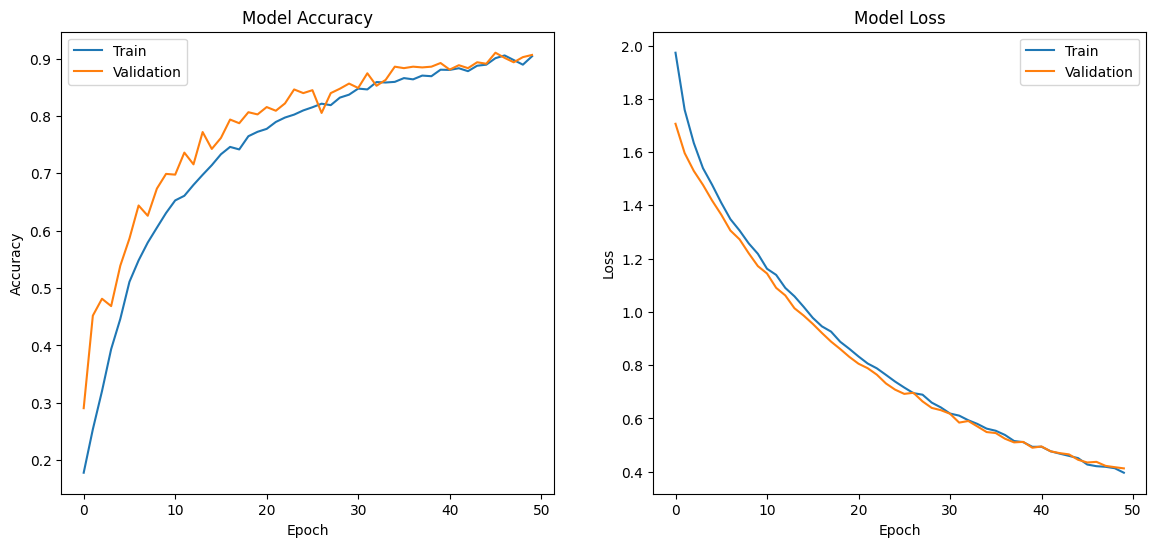

In [ ]:
plot_history(history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 496ms/step
Evaluating the model...
Classification Report:
              precision    recall  f1-score   support

         One       0.90      0.88      0.89        69
         Ten       0.88      0.92      0.90        62
     Hundred       0.88      0.87      0.87        60
         Two       0.95      0.96      0.95        76
        Five       0.97      0.98      0.98        62
       Fifty       0.93      0.89      0.91        62

    accuracy                           0.92       391
   macro avg       0.92      0.92      0.92       391
weighted avg       0.92      0.92      0.92       391



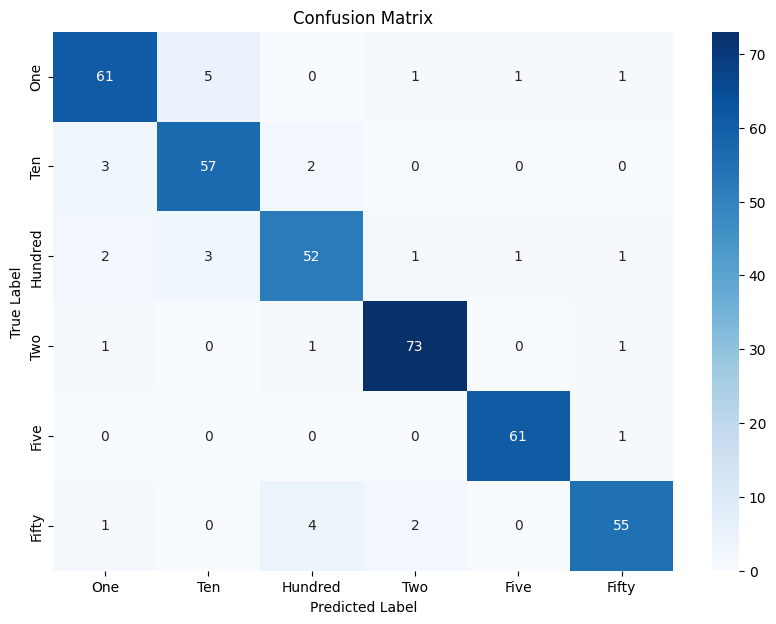

In [ ]:
evaluate_model(model, X_test, Y_test)

### MODEL 02

In [ ]:
# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer to reduce the feature map dimensions
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01) )(x)  # Fully connected layer with 1024 units
x = Dropout(0.2)(x)  # Dropout layer to prevent overfitting
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=50,
                    batch_size=32)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,639,878 (93.99 MB)

 Trainable params: 1,052,166 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 157ms/step - accuracy: 0.2156 - loss: 5.4980 - val_accuracy: 0.3828 - val_loss: 1.9126
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3403 - loss: 1.9273 - val_accuracy: 0.4289 - val_loss: 1.7657
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3981 - loss: 1.7712 - val_accuracy: 0.4405 - val_loss: 1.7146
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4218 - loss: 1.6999 - val_accuracy: 0.4571 - val_loss: 1.6317
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4223 - loss: 1.6298 - val_accuracy: 0.4417 - val_loss: 1.5700
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4673 - loss: 1.5704 - val_accuracy: 0.5006 - val_loss: 1.5294
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4659 - loss: 1.5679 - val_accuracy: 0.5787 - val_loss: 1.4975
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5387 - loss: 1.5036 - val_accuracy: 0.6018 -

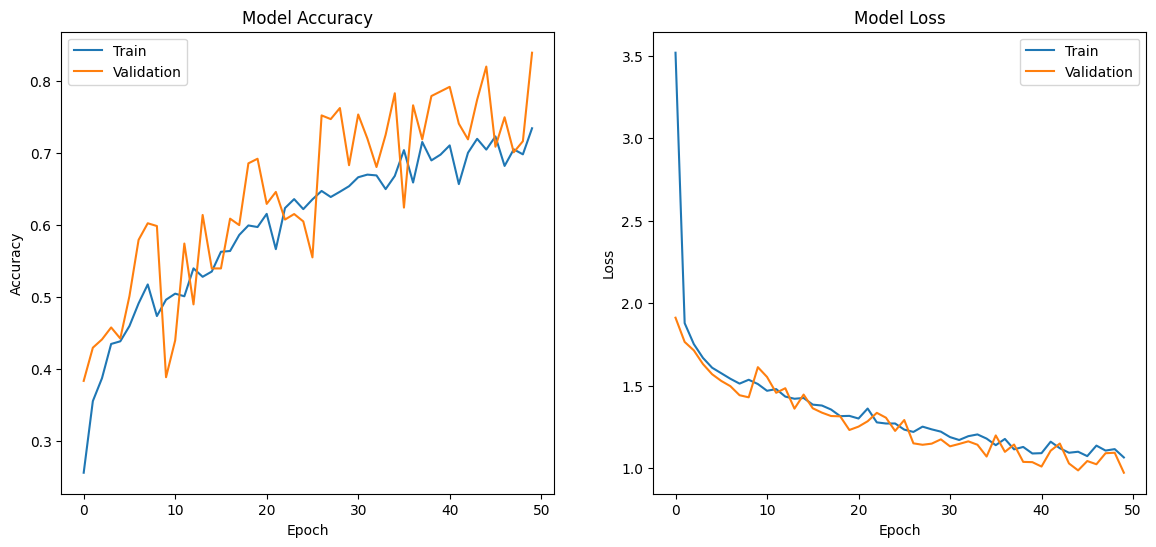

In [ ]:
plot_history(history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step
Evaluating the model...
Classification Report:
              precision    recall  f1-score   support

         One       0.75      0.78      0.77        69
         Ten       0.89      0.79      0.84        62
     Hundred       0.88      0.83      0.85        60
         Two       0.79      0.87      0.82        76
        Five       0.93      0.92      0.93        62
       Fifty       0.90      0.90      0.90        62

    accuracy                           0.85       391
   macro avg       0.86      0.85      0.85       391
weighted avg       0.85      0.85      0.85       391



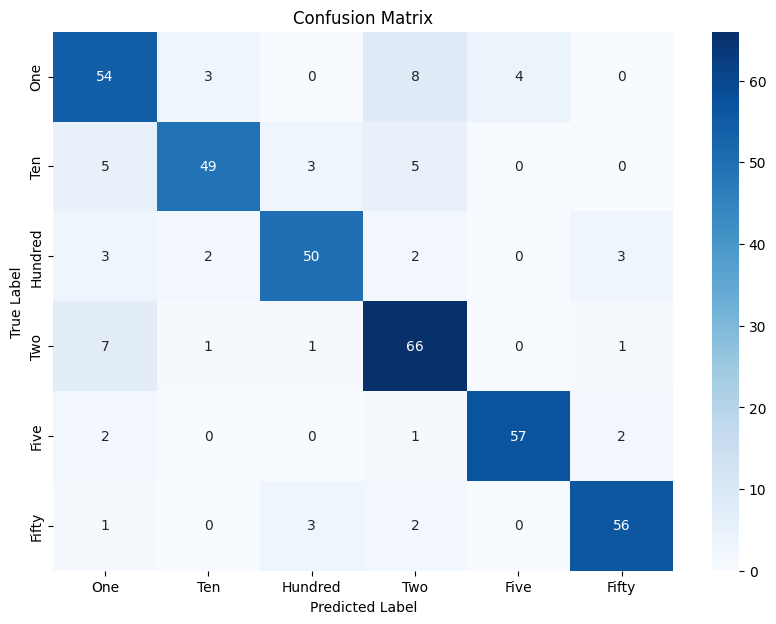

In [ ]:
evaluate_model(model, X_test, Y_test)

MODEL 03

In [ ]:
# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer to reduce the feature map dimensions
x = Dense(512, activation='relu', )(x)  # Fully connected layer with 1024 units
x = Dropout(0.2)(x)  # Dropout layer to prevent overfitting

predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=100,
                    batch_size=32)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,639,878 (93.99 MB)

 Trainable params: 1,052,166 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.2183 - loss: 1.9075 - val_accuracy: 0.4545 - val_loss: 1.5620
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4121 - loss: 1.5021 - val_accuracy: 0.5954 - val_loss: 1.3504
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5172 - loss: 1.3163 - val_accuracy: 0.5570 - val_loss: 1.2331
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5879 - loss: 1.1596 - val_accuracy: 0.6748 - val_loss: 1.0104
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6806 - loss: 1.0038 - val_accuracy: 0.7721 - val_loss: 0.8877
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7410 - loss: 0.8678 - val_accuracy: 0.7516 - val_loss: 0.7919
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7564 - loss: 0.7877 - val_accuracy: 0.7439 - val_loss: 0.7442
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8037 - loss: 0.6701 - val_accuracy: 

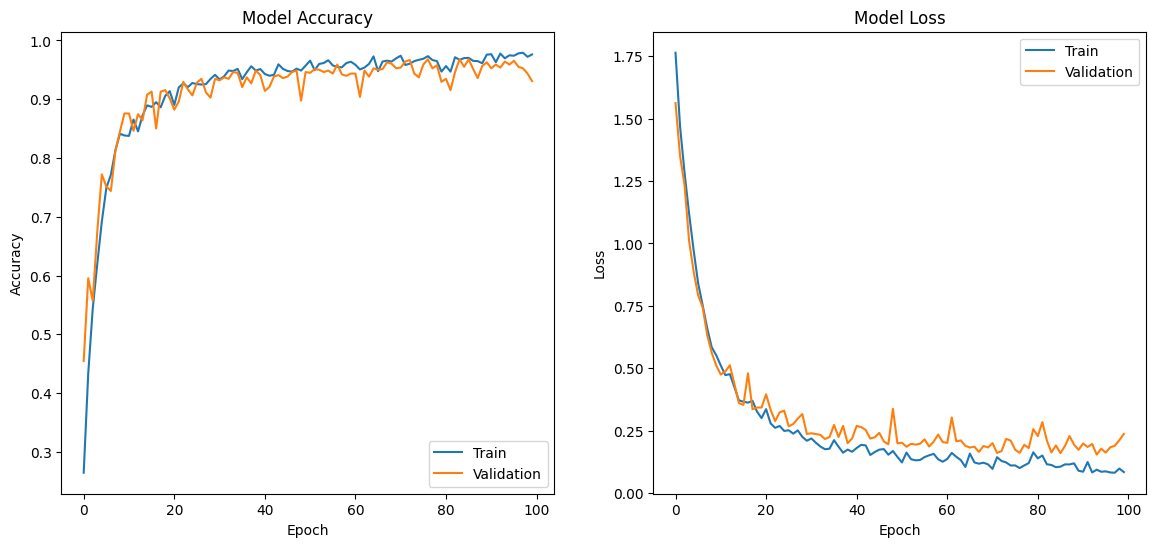

In [ ]:
plot_history(history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step
Evaluating the model...
Classification Report:
              precision    recall  f1-score   support

         One       0.77      0.97      0.86        69
         Ten       1.00      0.84      0.91        62
     Hundred       0.97      0.95      0.96        60
         Two       1.00      0.88      0.94        76
        Five       0.97      0.98      0.98        62
       Fifty       0.95      0.97      0.96        62

    accuracy                           0.93       391
   macro avg       0.94      0.93      0.93       391
weighted avg       0.94      0.93      0.93       391



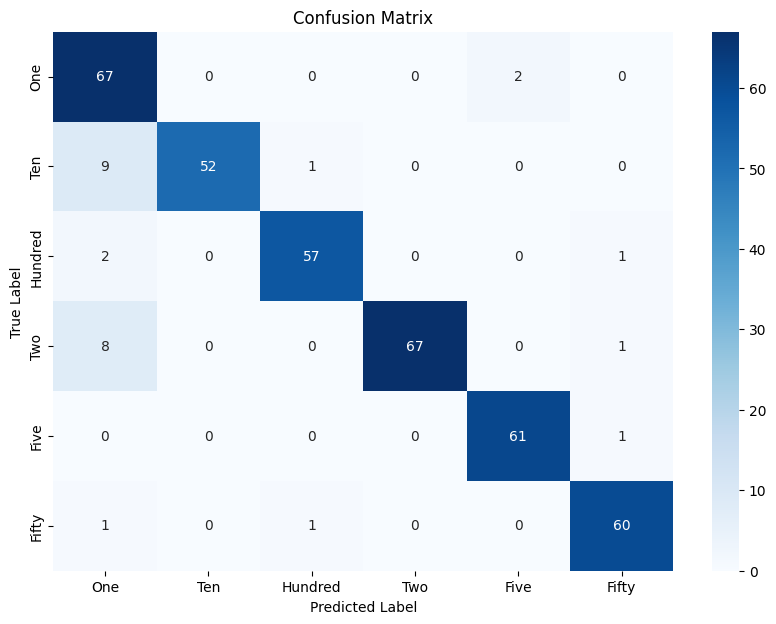

In [ ]:
evaluate_model(model, X_test, Y_test)

### MODEL 04

In [ ]:
# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer to reduce the feature map dimensions
x = Dense(512, activation='relu', )(x)  # Fully connected layer with 1024 units
x = Dropout(0.2)(x)  # Dropout layer to prevent overfitting
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=100,
                    batch_size=32)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,769,670 (94.49 MB)

 Trainable params: 1,181,958 (4.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.1930 - loss: 1.8207 - val_accuracy: 0.3022 - val_loss: 1.7044
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2554 - loss: 1.7313 - val_accuracy: 0.3483 - val_loss: 1.6496
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3263 - loss: 1.6405 - val_accuracy: 0.5262 - val_loss: 1.5476
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3993 - loss: 1.5634 - val_accuracy: 0.5301 - val_loss: 1.4675
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4461 - loss: 1.4847 - val_accuracy: 0.5723 - val_loss: 1.3966
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5277 - loss: 1.3795 - val_accuracy: 0.4840 - val_loss: 1.3352
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5322 - loss: 1.3259 - val_accuracy: 0.5839 - val_loss: 1.2453
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5808 - loss: 1.2328 - val_accuracy: 

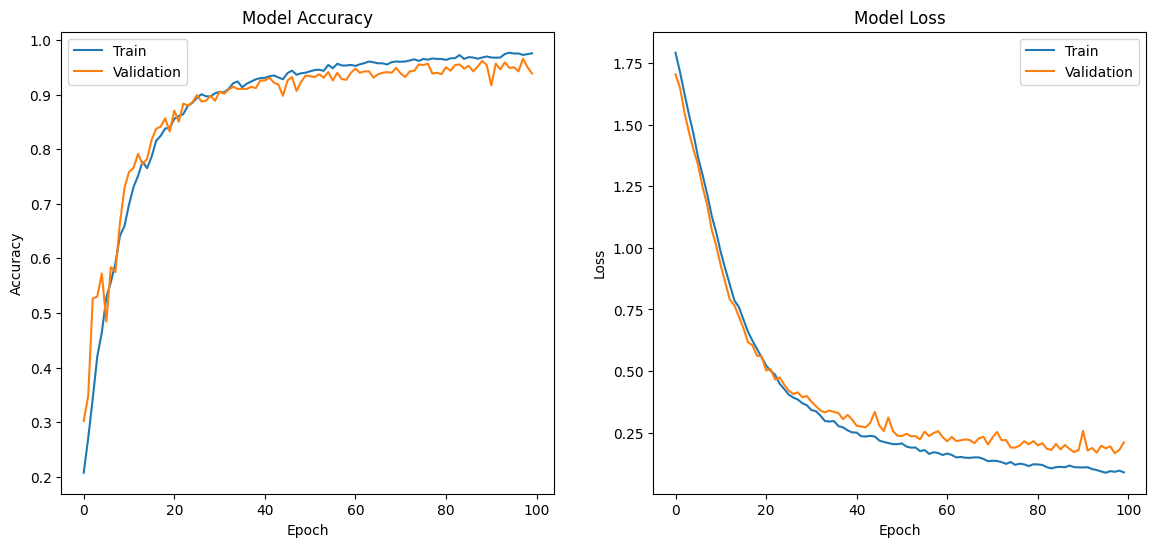

In [ ]:
plot_history(history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step
Evaluating the model...
Classification Report:
              precision    recall  f1-score   support

         One       0.89      0.97      0.93        69
         Ten       0.95      0.95      0.95        62
     Hundred       0.98      0.85      0.91        60
         Two       1.00      0.96      0.98        76
        Five       0.94      0.98      0.96        62
       Fifty       0.94      0.97      0.95        62

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



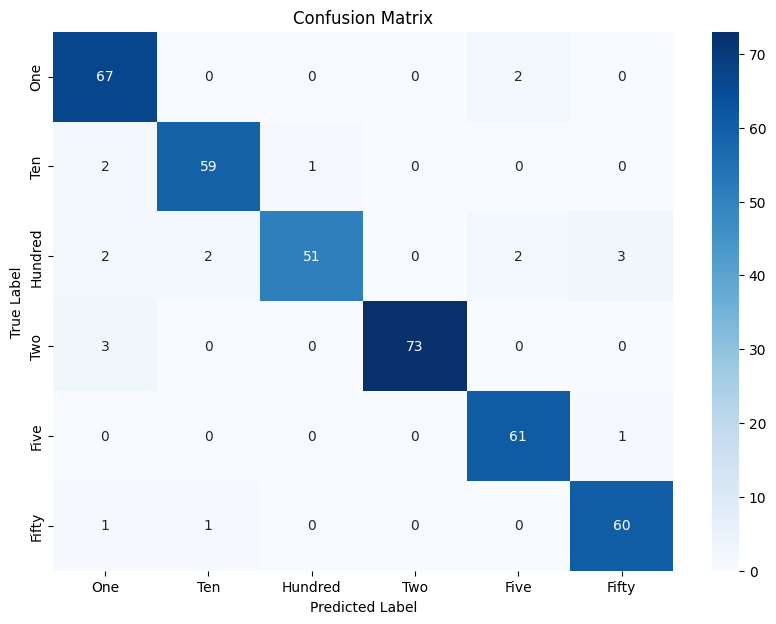

In [ ]:
evaluate_model(model, X_test, Y_test)

### MODEL 05

In [ ]:
# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer to reduce the feature map dimensions
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01) )(x)
x = BatchNormalization() (x) # Fully connected layer with 1024 units
# x = Dropout(0.2)(x)  # Dropout layer to prevent overfitting
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization() (x)
# x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.000001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=1000,
                    batch_size=32)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,772,742 (94.50 MB)

 Trainable params: 1,183,494 (4.51 MB)

 Non-trainable params: 23,589,248 (89.99 MB)

Epoch 1/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.1401 - loss: 14.1908 - val_accuracy: 0.1575 - val_loss: 13.4371
Epoch 2/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1458 - loss: 13.9812 - val_accuracy: 0.1652 - val_loss: 13.3686
Epoch 3/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1711 - loss: 13.7350 - val_accuracy: 0.2292 - val_loss: 13.3111
Epoch 4/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.2071 - loss: 13.4941 - val_accuracy: 0.2586 - val_loss: 13.2378
Epoch 5/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2532 - loss: 13.2901 - val_accuracy: 0.3060 - val_loss: 13.1311
Epoch 6/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2936 - loss: 13.1325 - val_accuracy: 0.3444 - val_loss: 13.0185
Epoch 7/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3426 - loss: 13.0176 - val_accuracy: 0.3944 - val_loss: 12.9114
Epoch 8/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3930 - loss: 1

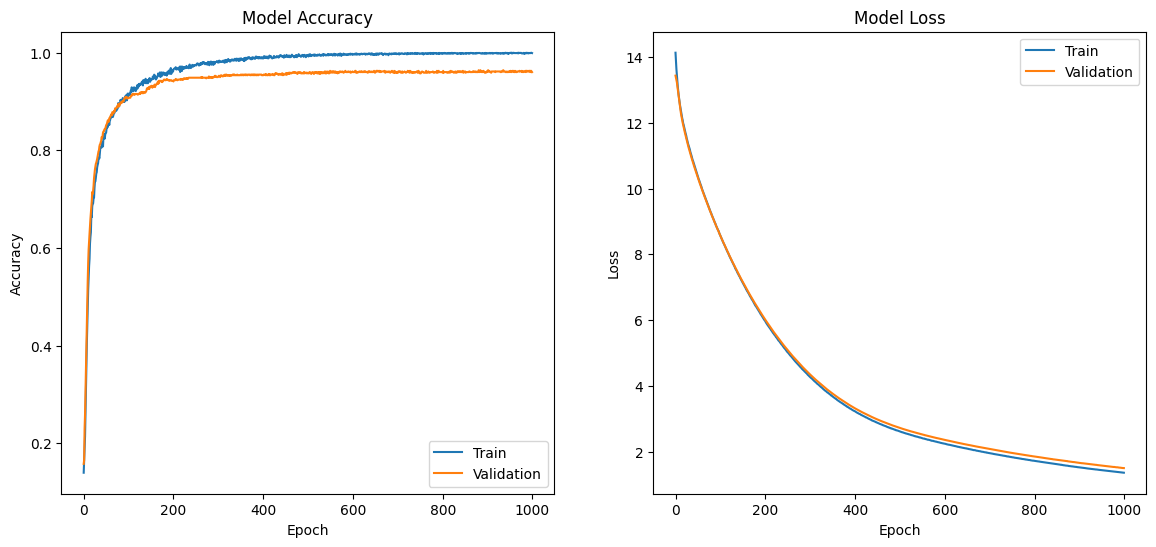

In [ ]:
plot_history(history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step
Evaluating the model...
Classification Report:
              precision    recall  f1-score   support

         One       0.99      1.00      0.99        69
         Ten       0.98      0.94      0.96        62
     Hundred       0.95      0.97      0.96        60
         Two       0.96      0.96      0.96        76
        Five       1.00      1.00      1.00        62
       Fifty       0.98      1.00      0.99        62

    accuracy                           0.98       391
   macro avg       0.98      0.98      0.98       391
weighted avg       0.98      0.98      0.98       391



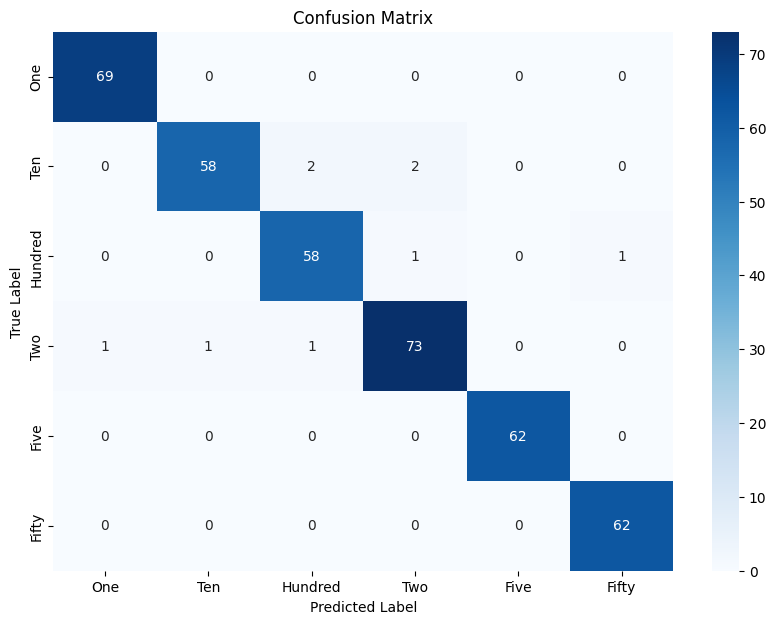

In [ ]:
evaluate_model(model, X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


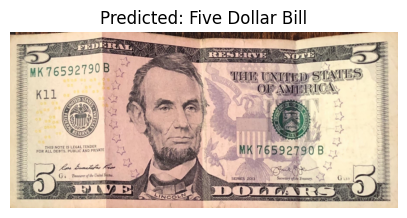

In [ ]:
from keras.preprocessing import image
from pdf2image import convert_from_path

# Convert the PDF to images
images = convert_from_path('/content/NIKHILtest.pdf')

# Save and process each image
for i, img in enumerate(images):
    img_path = f'page_{i}.png'
    img.save(img_path, 'PNG')

    # Load the saved image and preprocess it
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the label using the model
    prediction = model.predict(img_array)
    label = np.argmax(prediction)

    # Mapping the numeric label to the actual currency type
    label_map = {
        0: "Fifty Dollar Bill",
        1: "Five Dollar Bill",
        2: "One Dollar Bill",
        3: "Ten Dollar Bill",
        4: "Twenty Dollar Bill",
        5: "Hundred Dollar Bill"
    }
    predicted_label = label_map[label]

    # Display the image with the prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


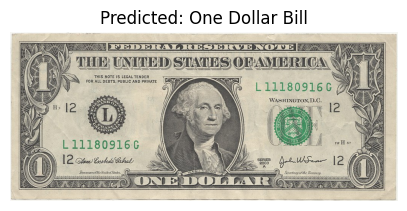

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


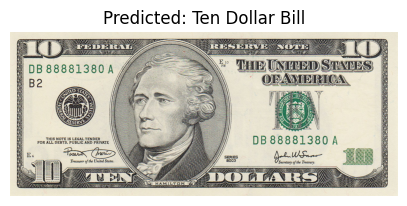

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


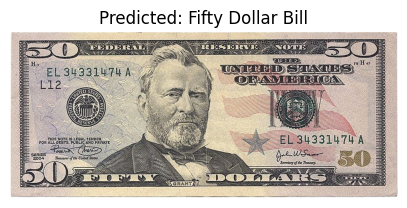

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


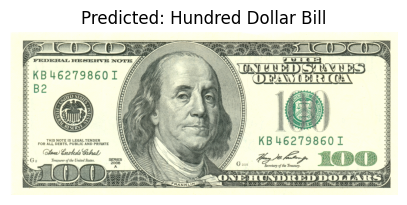

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


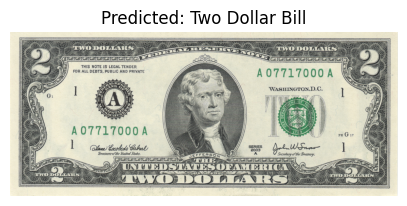

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


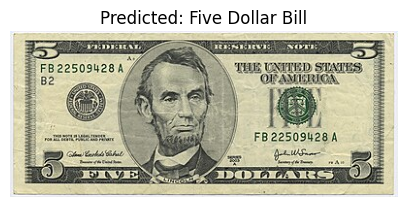

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to the test images directory
test_dir = '/content/drive/MyDrive/personal_project/Test_Set'  # Replace with your actual test directory path

# List all image files in the directory
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png') or f.endswith('.jpg')]

# Define the label mapping
label_map = {
    0: "Fifty Dollar Bill",
    1: "Five Dollar Bill",
    2: "One Dollar Bill",
    3: "Ten Dollar Bill",
    4: "Two Dollar Bill",
    5: "Hundred Dollar Bill"
}

# Process each image in the directory
for img_file in image_files:
    img_path = os.path.join(test_dir, img_file)

    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the label using the model
    prediction = model.predict(img_array)
    label = np.argmax(prediction)

    # Map the predicted label to the currency type
    predicted_label = label_map[label]

    # Display the image with the prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


### MODEL 06

In [ ]:
# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer to reduce the feature map dimensions
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)  # Fully connected layer with 1024 units
x = Dropout(0.2)(x)  # Dropout layer to prevent overfitting
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=500,
                    batch_size=32)


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,692,038 (98.01 MB)

 Trainable params: 2,104,326 (8.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.1771 - loss: 13.8412 - val_accuracy: 0.3111 - val_loss: 9.5077
Epoch 2/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2481 - loss: 8.5908 - val_accuracy: 0.3662 - val_loss: 6.0652
Epoch 3/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3012 - loss: 5.5704 - val_accuracy: 0.5378 - val_loss: 4.1262
Epoch 4/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3488 - loss: 3.8770 - val_accuracy: 0.4507 - val_loss: 3.0674
Epoch 5/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4062 - loss: 2.9223 - val_accuracy: 0.5442 - val_loss: 2.4824
Epoch 6/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4067 - loss: 2.4411 - val_accuracy: 0.4750 - val_loss: 2.1812
Epoch 7/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4563 - loss: 2.1609 - val_accuracy: 0.5083 - val_loss: 1.9999
Epoch 8/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4683 - loss: 2.0052 - val_accuracy:

#### What's Happening?

1. **Adding Custom Layers:**
   - **`GlobalAveragePooling2D()(x):`** Reduces the spatial dimensions of the feature maps by taking the average value across each feature map. This reduces the number of parameters and helps prevent overfitting.
   - **`Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x):`** Adds a fully connected layer with 1024 units and ReLU activation. The `l2(0.01)` regularizer applies L2 regularization to prevent overfitting.
   - **`Dropout(0.2)(x):`** Adds a dropout layer with a dropout rate of 0.2. This randomly sets 20% of the units to zero during training to prevent overfitting.
   - **`Dense(num_classes, activation='softmax')(x):`** Adds an output layer with a number of units equal to the number of classes (`num_classes`). The softmax activation function is used to convert the output into probability scores for each class.

2. **Creating the Model:**
   - **`model = Model(inputs=base_model.input, outputs=predictions):`** Creates the final model by specifying the input from the base model and the output from the custom layers.

3. **Compiling the Model:**
   - **`model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']):`** Compiles the model using the Adam optimizer with a learning rate of 0.0001, categorical cross-entropy loss (suitable for multi-class classification), and accuracy as the evaluation metric.

4. **Training the Model:**
   - **`history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=500, batch_size=32):`** Trains the model using the training data (`X_train`, `Y_train`) and validates it using the validation data (`X_val`, `Y_val`). The model is trained for 500 epochs with a batch size of 32.


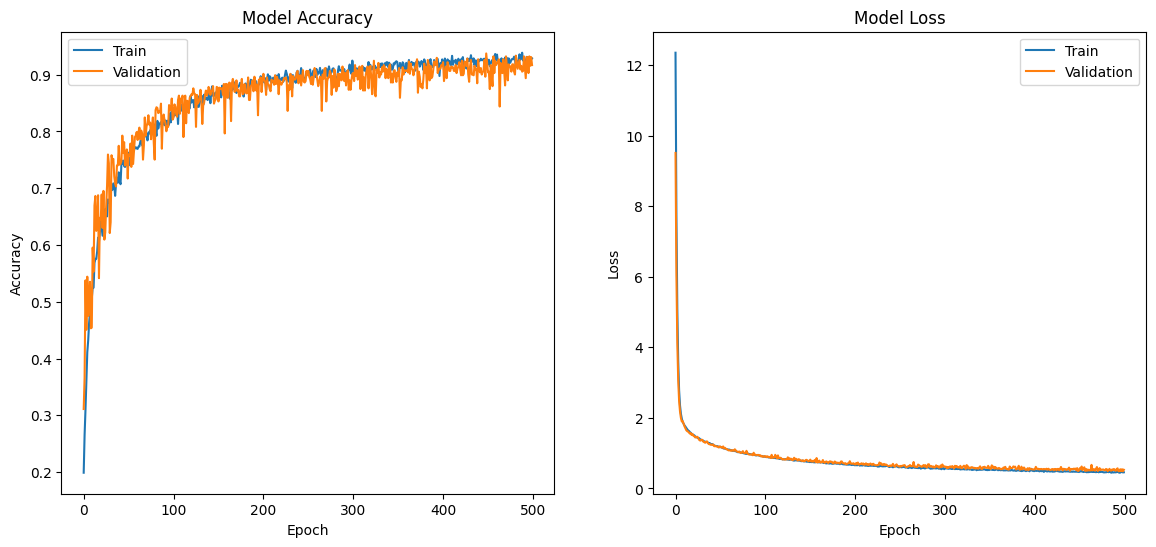

In [ ]:
plot_history(history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step
Evaluating the model...
Classification Report:
              precision    recall  f1-score   support

         One       0.92      0.95      0.94        63
         Ten       0.97      0.96      0.97        73
     Hundred       0.93      0.96      0.94        77
         Two       1.00      0.84      0.91        70
        Five       0.98      1.00      0.99        49
       Fifty       0.83      0.92      0.87        59

    accuracy                           0.94       391
   macro avg       0.94      0.94      0.94       391
weighted avg       0.94      0.94      0.94       391



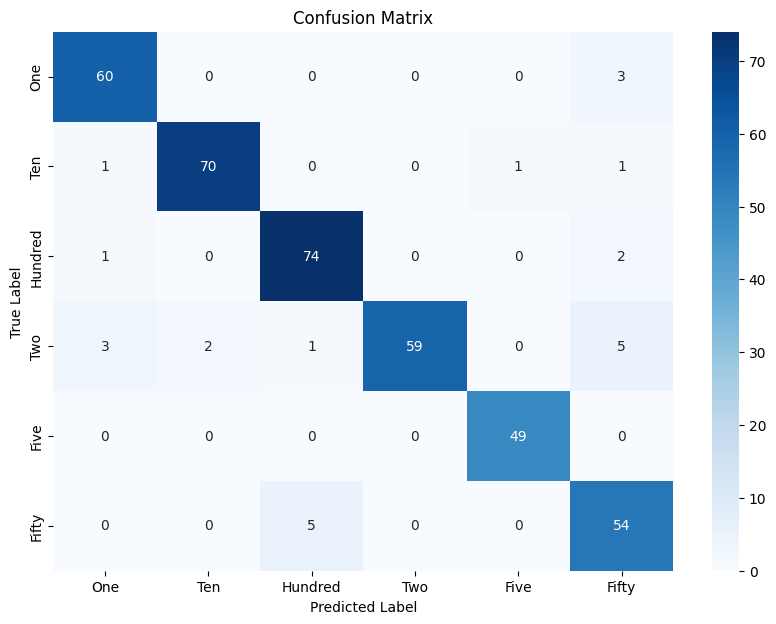

In [ ]:
evaluate_model(model, X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


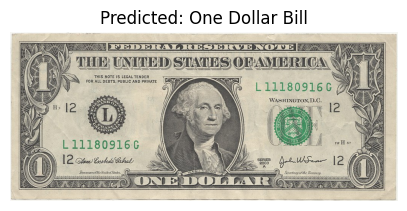

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


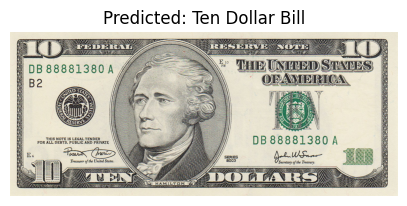

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


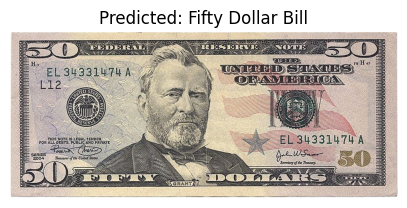

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


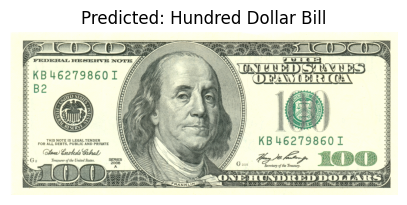

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


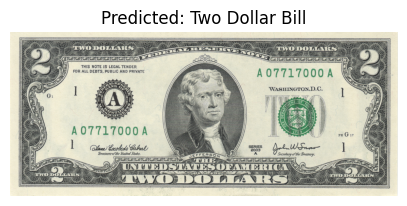

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


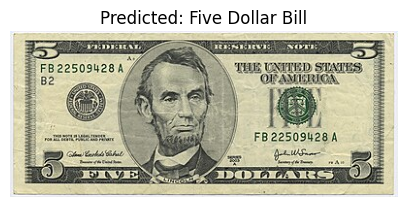

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to the test images directory
test_dir = '/content/drive/MyDrive/personal_project/Test_Set'  # Replace with your actual test directory path

# List all image files in the directory
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png') or f.endswith('.jpg')]

# Define the label mapping
label_map = {
    0: "Fifty Dollar Bill",
    1: "Five Dollar Bill",
    2: "One Dollar Bill",
    3: "Ten Dollar Bill",
    4: "Two Dollar Bill",
    5: "Hundred Dollar Bill"
}

# Process each image in the directory
for img_file in image_files:
    img_path = os.path.join(test_dir, img_file)

    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the label using the model
    prediction = model.predict(img_array)
    label = np.argmax(prediction)

    # Map the predicted label to the currency type
    predicted_label = label_map[label]

    # Display the image with the prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


In [ ]:
model.save('/content/drive/MyDrive/personal_project/MODEL/currency_model.h5')

In [6]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('/content/drive/MyDrive/personal_project/MODEL/currency_model.h5')

# Define the label mapping used for prediction
label_map_reverse = {
    0: "Fifty Dollar Bill",
    1: "Five Dollar Bill",
    2: "One Dollar Bill",
    3: "Ten Dollar Bill",
    4: "Two Dollar Bill",
    5: "Hundred Dollar Bill"
}

def predict_currency(img):
    # Preprocess the image
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the label using the model
    prediction = model.predict(img_array)
    label = np.argmax(prediction)
    predicted_label = label_map_reverse[label]

    return predicted_label

# Create a Gradio interface using the updated components
interface = gr.Interface(
    fn=predict_currency,                  # The prediction function
    inputs=gr.Image(type="pil"),          # The input is an image
    outputs=gr.Textbox(),                 # The output is text showing the prediction
    title="U.S. Currency Classification", # Interface title
    description="Upload an image of a U.S. dollar bill, and the model will predict its denomination."
)

# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6f5693579cb7e01852.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
